In [2]:
import pandas as pd

file_path = 'Digital_Music_5.json'
df = pd.read_json(file_path, lines=True)
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,3.0,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4,3.0,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169776,5,NaN,True,"08 19, 2018",A1SR2T84IXOMAQ,B01HJ91MTW,{'Format:': ' MP3 Music'},Diane B.,Casting Crowns songs are all wonderful!!,Great song!!,1534636800,NaN
169777,5,NaN,True,"03 18, 2018",A2SR3DWJR1PYR6,B01HJ91MTW,{'Format:': ' MP3 Music'},jan c.,Just reminds you that you are never alone.,Five Stars,1521331200,NaN
169778,5,NaN,True,"03 7, 2018",A24V7X30NIMOIY,B01HJ91MTW,{'Format:': ' MP3 Music'},Lori Y,"Good product, good service.",Five Stars,1520380800,NaN
169779,5,NaN,True,"02 12, 2018",A1LW10GYP2EYM1,B01HJ91MTW,{'Format:': ' MP3 Music'},N F,I love every single song this group sings. The...,Absolutely beautiful...,1518393600,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169781 entries, 0 to 169780
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         169781 non-null  int64  
 1   vote            7611 non-null    float64
 2   verified        169781 non-null  bool   
 3   reviewTime      169781 non-null  object 
 4   reviewerID      169781 non-null  object 
 5   asin            169781 non-null  object 
 6   style           157989 non-null  object 
 7   reviewerName    169776 non-null  object 
 8   reviewText      169623 non-null  object 
 9   summary         169745 non-null  object 
 10  unixReviewTime  169781 non-null  int64  
 11  image           182 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 14.4+ MB


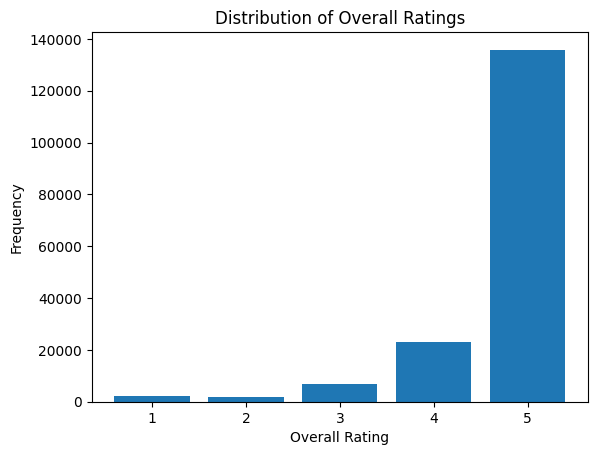

In [5]:
import matplotlib.pyplot as plt

rating_counts = df['overall'].value_counts()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()

### SVD

In [35]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import GridSearchCV
import time

# Start the timer
start_time = time.time()

file_path = 'Digital_Music_5.json'
df = pd.read_json(file_path, lines=True)

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.015, 0.02, 0.023],
              'reg_all': [0.03, 0.02, 0.01]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

gs.fit(data)


best_params = gs.best_params['rmse']

print("Best Parameters:", best_params)

best_svd_model = SVD(n_epochs=best_params['n_epochs'], 
                     lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

best_svd_model.fit(trainset)

train_predictions = best_svd_model.test(trainset.build_testset())
test_prediction = best_svd_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)
test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)


# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Best Parameters: {'n_epochs': 15, 'lr_all': 0.023, 'reg_all': 0.03}
RMSE: 0.1107
RMSE: 0.5305
Train RMSE with Tuned Model: 0.11071587358921507
Test RMSE with Tuned Model: 0.5304636239648827
Elapsed time: 62.96353101730347 seconds


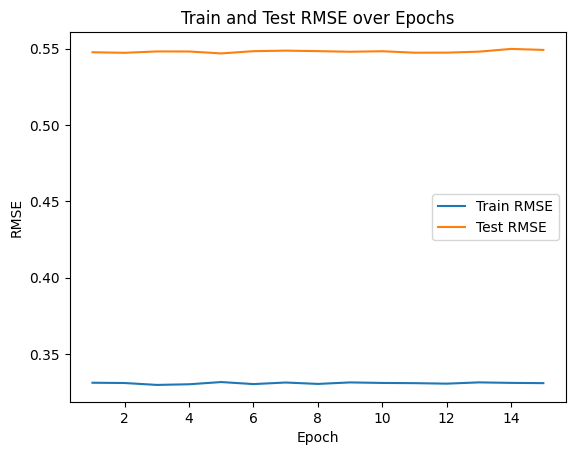

In [36]:
import matplotlib.pyplot as plt

model = SVD(n_epochs=15, lr_all=0.01, reg_all=0.02, verbose=False)

train_rmse_values = []
test_rmse_values = []

for epoch in range(1, model.n_epochs + 1):
    model.fit(trainset)
    
    train_predictions = model.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions, verbose=False)
    train_rmse_values.append(train_rmse)
    
    test_predictions = model.test(testset)
    test_rmse = accuracy.rmse(test_predictions, verbose=False)
    test_rmse_values.append(test_rmse)
    
epochs = range(1, model.n_epochs + 1)
plt.plot(epochs, train_rmse_values, label='Train RMSE')
plt.plot(epochs, test_rmse_values, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE over Epochs')
plt.legend()
plt.show()

### KNNBasic

In [19]:
from surprise import KNNBasic

# Start the timer
start_time = time.time()

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.001, 0.0005],
              'reg_all': [0.02, 0.015, 0.01], 'verbose': [False]}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

gs.fit(data)


best_params = gs.best_params['rmse']

print("Best Parameters:", best_params)

best_knn_basic_model = KNNBasic(n_epochs=best_params['n_epochs'], verbose=False,
                     lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
# best_knn_basic_model = gs

best_knn_basic_model.fit(trainset)

train_prediction = best_knn_basic_model.test(trainset.build_testset())

test_prediction = best_knn_basic_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Best Parameters: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.02, 'verbose': False}
RMSE: 0.3686
RMSE: 0.7139
Train RMSE with Tuned Model: 0.36859634279899656
Test RMSE with Tuned Model: 0.7138993223169253
Elapsed time: 347.8787729740143 seconds


### SVD++ Model

In [39]:
from surprise import SVDpp

# Start the timer
start_time = time.time()

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.015, 0.02, 0.025],
              'reg_all': [0.03, 0.025, 0.02]}

gs = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=3)

gs.fit(data)


best_params = gs.best_params['rmse']

print("Best Parameters:", best_params)

best_svd_pp_model = SVDpp(n_epochs=best_params['n_epochs'], 
                     lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

# best_svd_pp_model = gs
best_svd_pp_model.fit(trainset)

train_prediction = best_svd_pp_model.test(trainset.build_testset())

test_prediction = best_svd_pp_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Best Parameters: {'n_epochs': 15, 'lr_all': 0.025, 'reg_all': 0.03}
RMSE: 0.2697
RMSE: 0.5343
Train RMSE with Tuned Model: 0.269656666537684
Test RMSE with Tuned Model: 0.5343054469154331
Elapsed time: 139.2832109928131 seconds


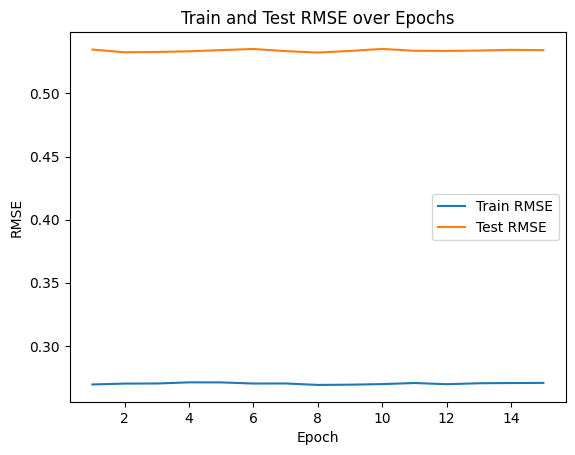

In [47]:
model = SVDpp(n_epochs=15, lr_all=0.025, reg_all=0.03, verbose=False)

train_rmse_values = []
test_rmse_values = []

for epoch in range(1, model.n_epochs + 1):
    model.fit(trainset)
    
    train_predictions = model.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions, verbose=False)
    train_rmse_values.append(train_rmse)
    
    test_predictions = model.test(testset)
    test_rmse = accuracy.rmse(test_predictions, verbose=False)
    test_rmse_values.append(test_rmse)
    
epochs = range(1, model.n_epochs + 1)
plt.plot(epochs, train_rmse_values, label='Train RMSE')
plt.plot(epochs, test_rmse_values, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE over Epochs')
plt.legend()
plt.show()

### Slope One

In [46]:
from surprise import SlopeOne

# Start the timer
start_time = time.time()

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

slope_one_model = SlopeOne()

slope_one_model.fit(trainset)

train_prediction = slope_one_model.test(trainset.build_testset())

test_prediction = slope_one_model.test(testset)

train_rmse = accuracy.rmse(train_prediction)

test_rmse = accuracy.rmse(test_prediction)
print("Train RMSE with Tuned Model:", train_rmse)
print("Test RMSE with Tuned Model:", test_rmse)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

RMSE: 0.1107
RMSE: 0.5811
Train RMSE with Tuned Model: 0.11071587358921507
Test RMSE with Tuned Model: 0.5811011878805571
Elapsed time: 4.594622373580933 seconds
